In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay
from ctapipe.utils import get_dataset_path
from ctapipe.io import event_source
from ctapipe.calib import CameraCalibrator
from ctapipe.image.cleaning import tailcuts_clean
from ctapipe.image.hillas import hillas_parameters
from copy import deepcopy
import os

In [2]:
import ctapipe
ctapipe.__version__

'0.8.0'

In [3]:
source = event_source(get_dataset_path('gamma_test_large.simtel.gz'))
# source = event_source('/Users/thomasvuillaume/Work/CTA/Data/DL0/Simtel/LST_mono/gamma_20deg_180deg_run100___cta-prod3-demo-2147m-LaPalma-baseline-mono_off0.4.simtel',
#                      max_events=1000)

In [4]:
tot = 0
n = 3
for event in source:
    if 1 in event.r0.tels_with_data:
        if event.r0.tel[1].waveform[0].sum() > tot:
            tot = event.r0.tel[1].waveform[0].sum()
            big_event = deepcopy(event)
    if len(event.r0.tels_with_data) > n:
        be2 = deepcopy(event)
        n = len(event.r0.tels_with_data)

In [5]:
big_event.r0.tels_with_data

{1, 2, 3, 4, 5, 7, 9, 10, 11, 13, 16}

In [6]:
cal = CameraCalibrator(source.subarray)

In [7]:
cal(big_event)
cal(be2)

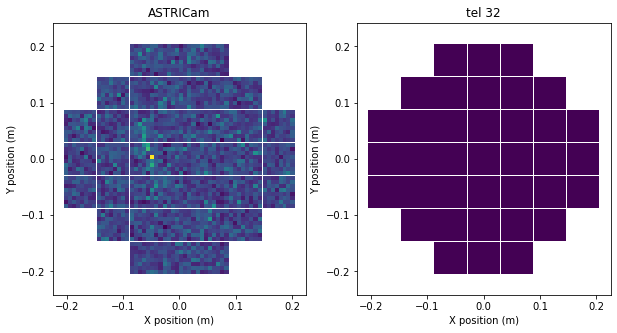

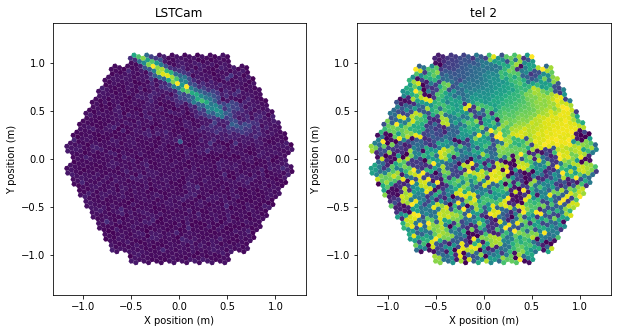

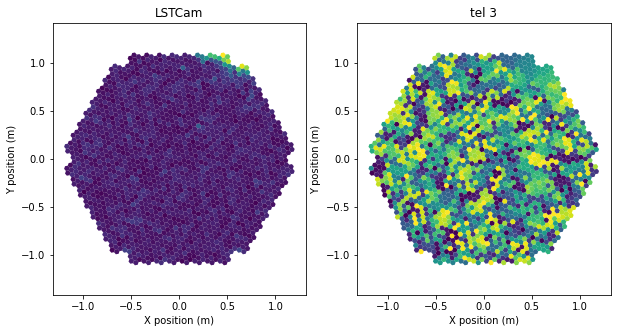

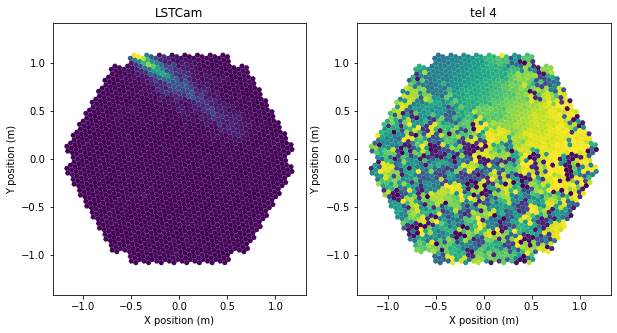

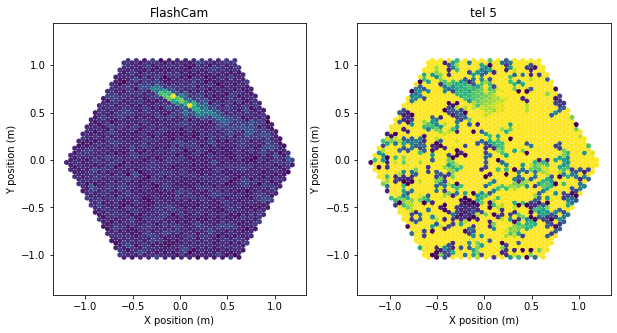

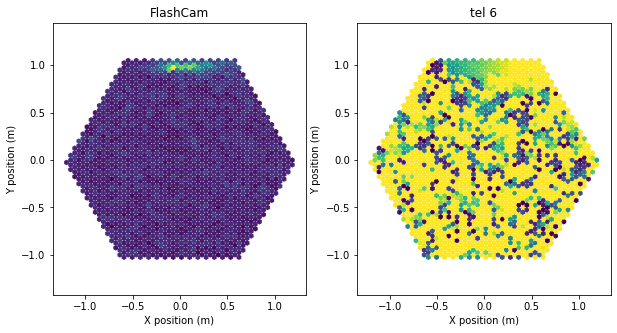

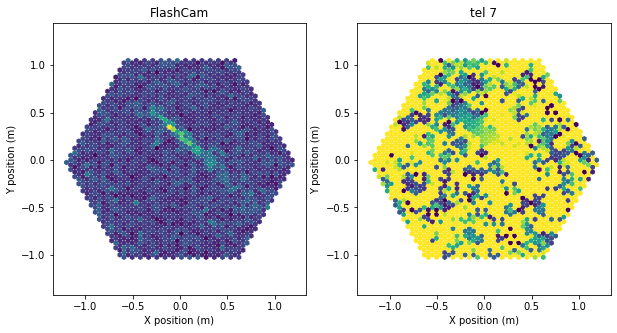

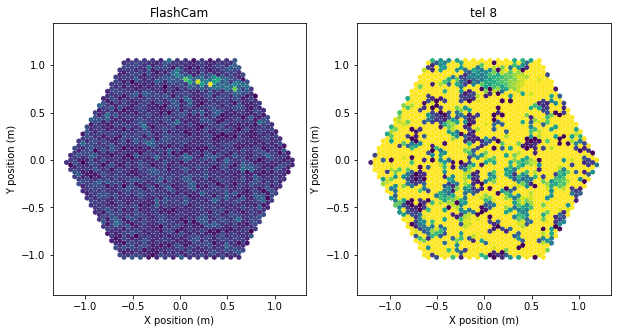

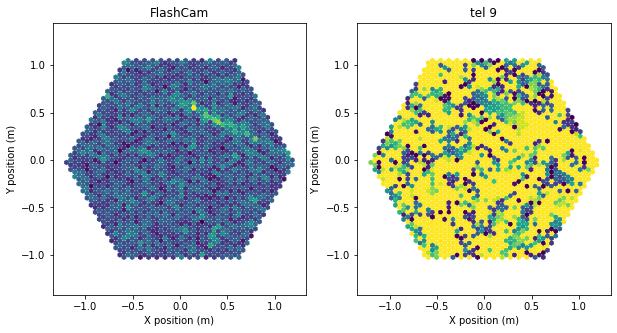

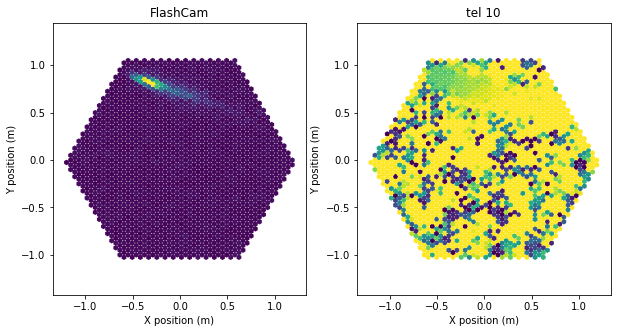

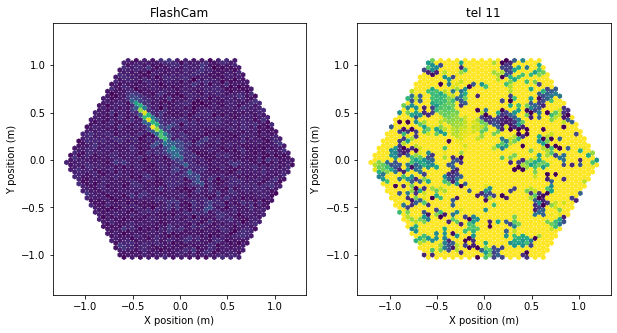

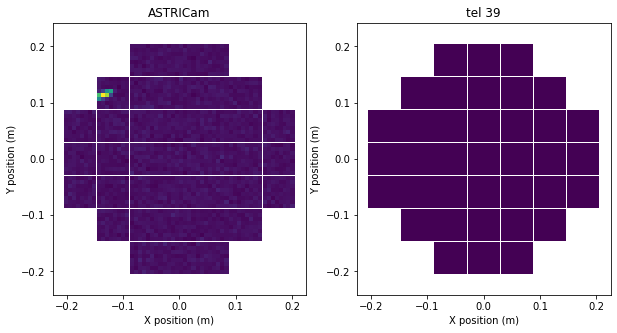

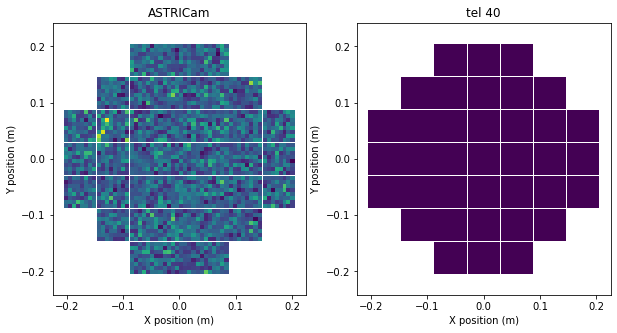

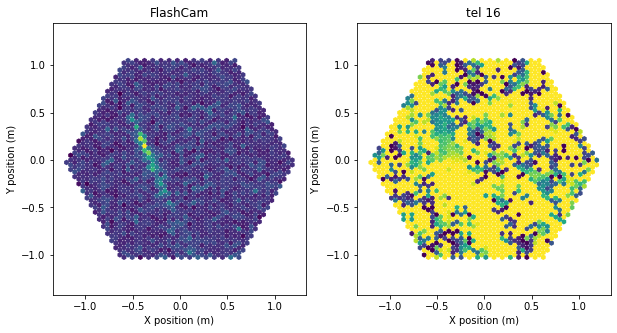

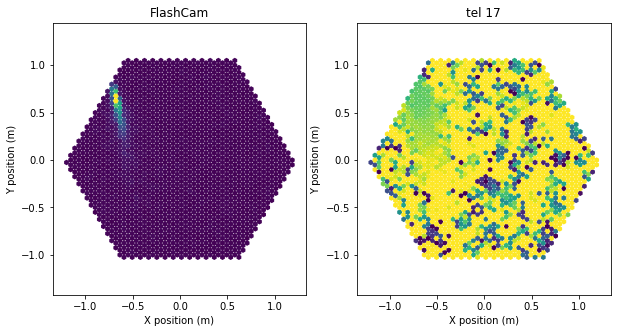

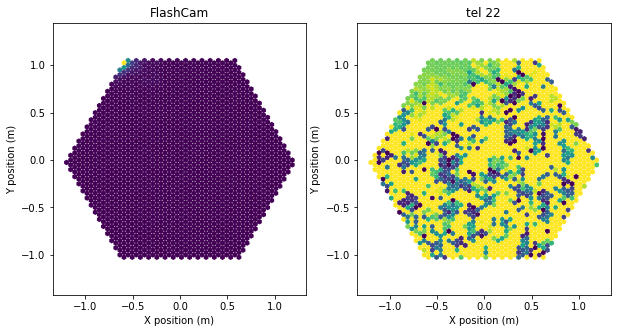

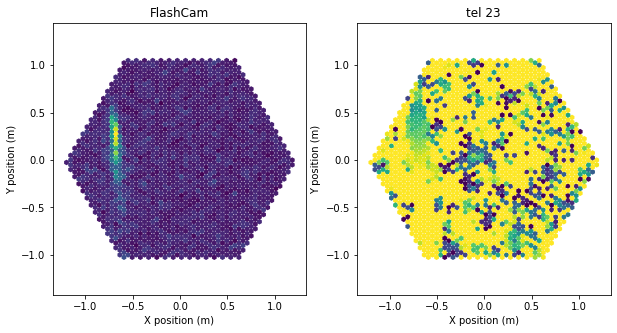

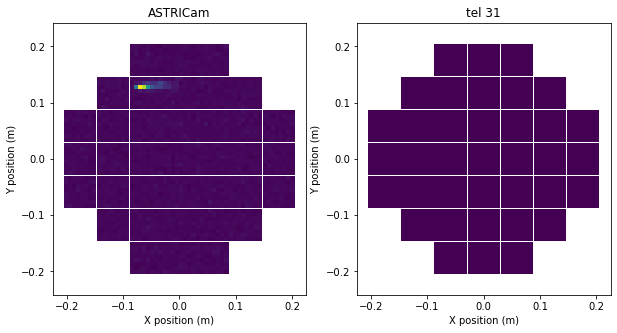

In [19]:
for tel_id in be2.r0.tels_with_data:
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    geom = source.subarray.tels[tel_id].camera.geometry
    image = be2.dl1.tel[tel_id].image
    pulse_time = be2.dl1.tel[tel_id].peak_time
    pulse_time = np.maximum(0, np.minimum(40, pulse_time))
    CameraDisplay(geom, image, ax=axes[0])
    CameraDisplay(geom, pulse_time, ax=axes[1])
    axes[1].set_title(f'tel {tel_id}')
    plt.show()

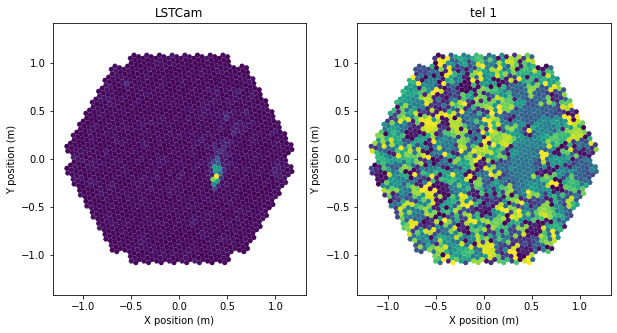

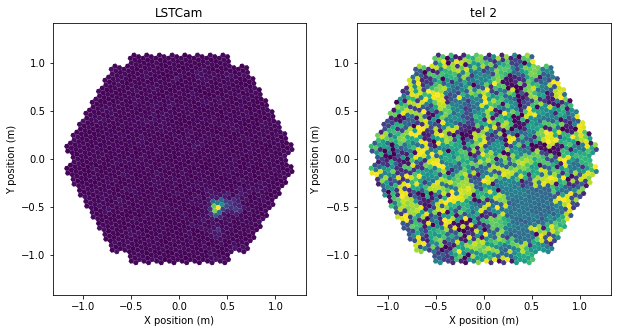

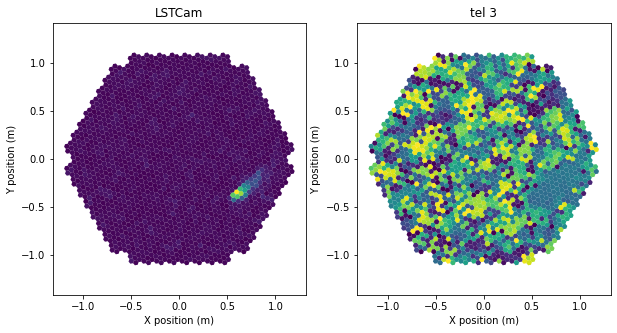

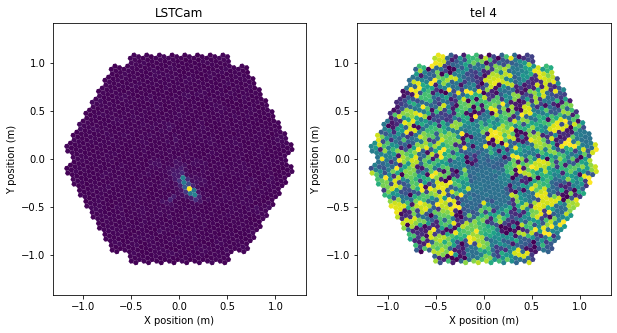

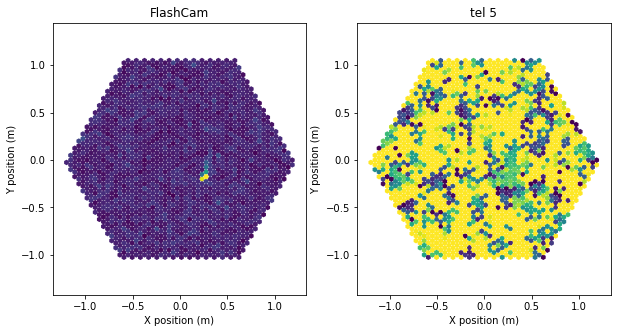

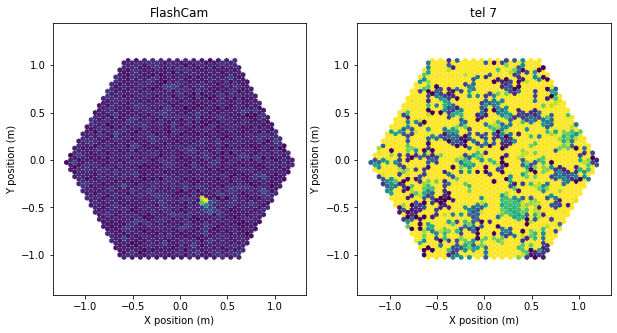

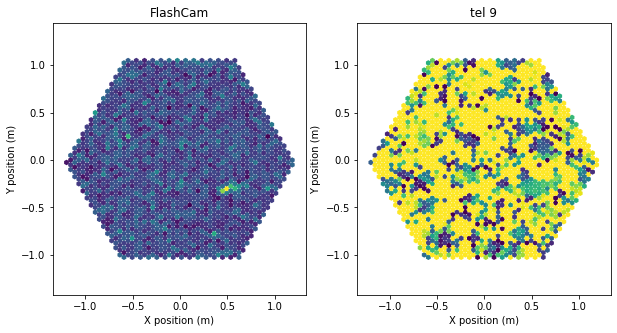

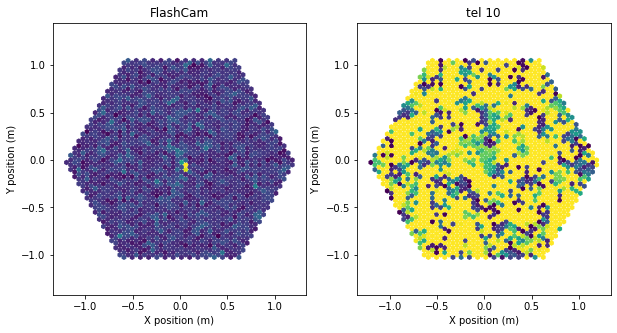

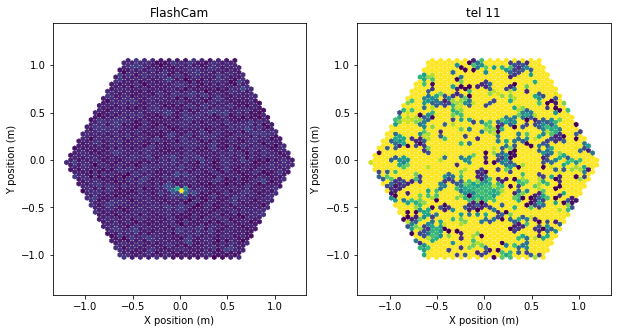

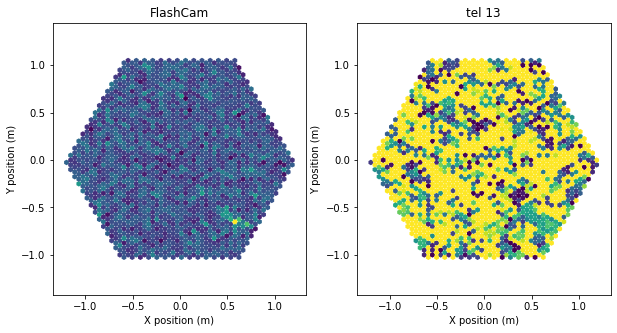

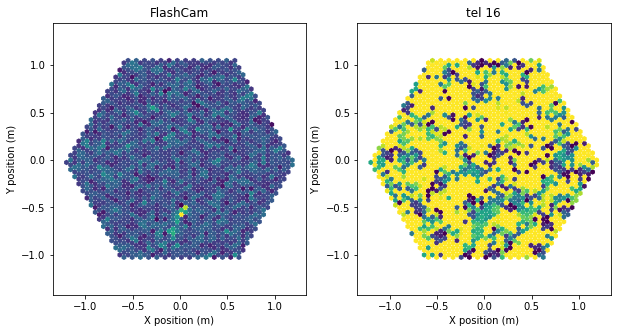

In [12]:
for tel_id in big_event.r0.tels_with_data:
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    geom = source.subarray.tels[tel_id].camera.geometry
    image = big_event.dl1.tel[tel_id].image
    pulse_time = big_event.dl1.tel[tel_id].peak_time
    pulse_time = np.maximum(0, np.minimum(40, pulse_time))
    CameraDisplay(geom, image, ax=axes[0])
    CameraDisplay(geom, pulse_time, ax=axes[1])
    axes[1].set_title(f'tel {tel_id}')
    plt.show()

In [42]:
# pick an event and a tel
event = big_event
print(event.r0.tels_with_data)
tel_id = 1

{1, 2, 3, 4, 5, 7, 9, 10, 11, 13, 16}


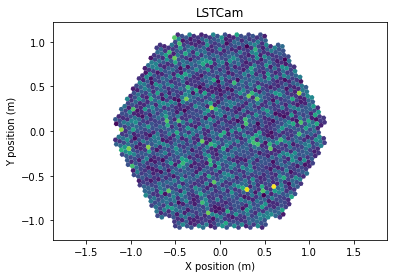

In [43]:
geom = source.subarray.tel[tel_id].camera.geometry
CameraDisplay(geom, event.r0.tel[tel_id].waveform[0][:,0])

In [44]:
output_dir = f'images_gif_tel_{tel_id}'
os.makedirs(output_dir)

In [46]:
# define some plotting options

visible_axis = False
color = 'white' # or 'dark'
transparent = True
camera_border_color = 'white' # or None


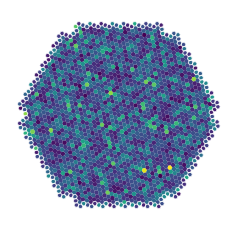

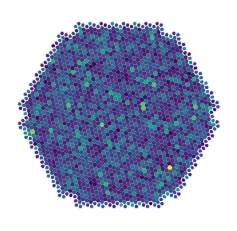

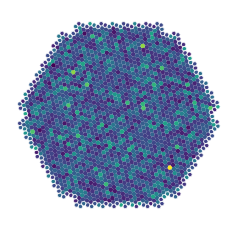

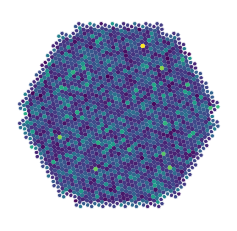

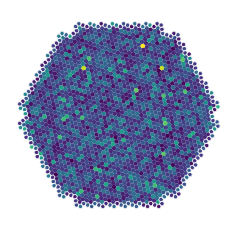

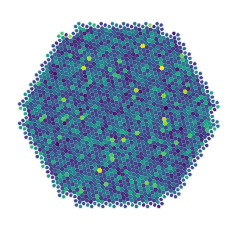

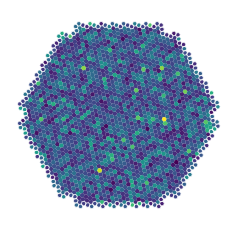

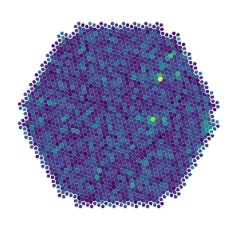

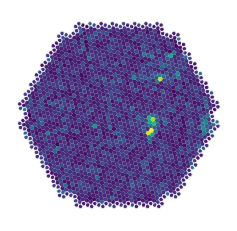

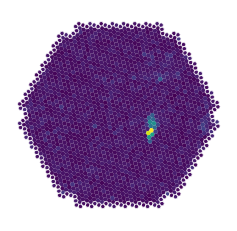

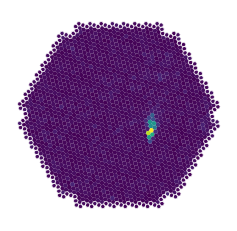

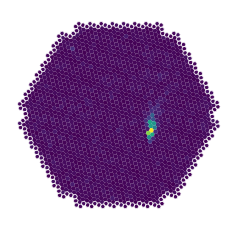

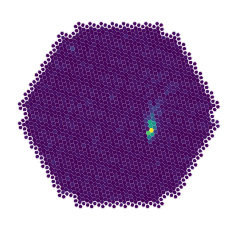

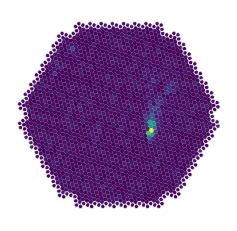

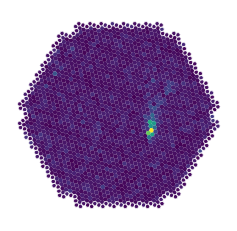

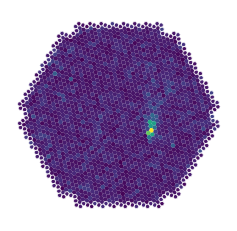

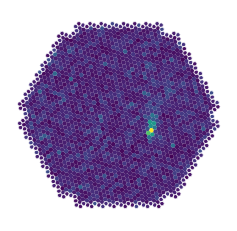

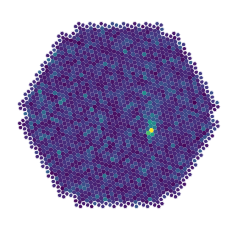

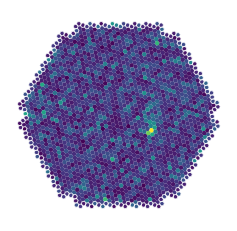

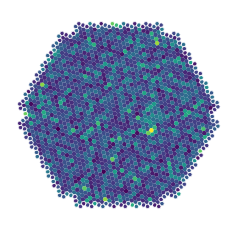

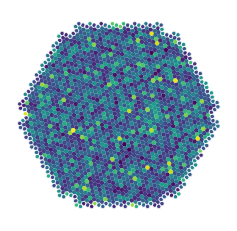

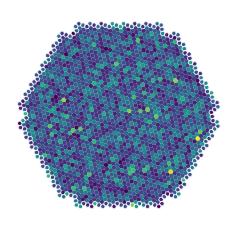

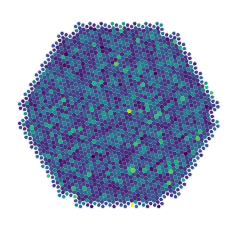

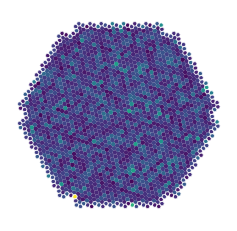

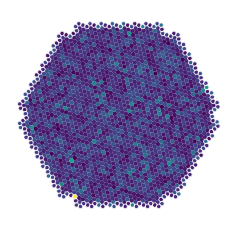

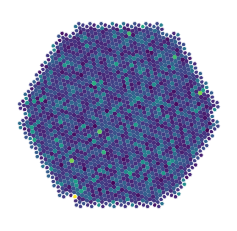

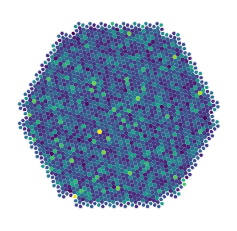

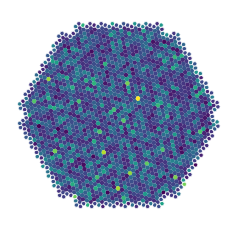

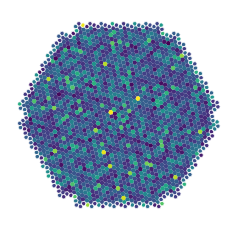

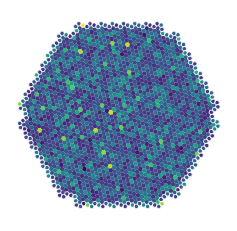

In [47]:
for ii in range(event.r0.tel[tel_id].waveform[0].shape[1]):
    image = event.r0.tel[tel_id].waveform[0][:,ii]
#     print(image.shape)
    fig, ax = plt.subplots(figsize=(4, 4))
    display = CameraDisplay(geom, image)
    if camera_border_color is not None:
        display.highlight_pixels(geom.get_border_pixel_mask(), color=camera_border_color)
    fig.axes[0].get_xaxis().set_visible(visible_axis)
    fig.axes[0].get_yaxis().set_visible(visible_axis)
    fig.patch.set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
    ax.set_title('')

    plt.savefig(os.path.join(output_dir, f'image_{ii:02d}.png'), dpi=400, transparent=transparent)
    plt.show()

In [48]:
# produce the gif
gif_cmd = f'convert -delay 40 -loop 0 {output_dir}/*.png waveform_tel_{tel_id}.gif'
os.system(gif_cmd)

0

In [49]:
ls -lsh *.gif

28800 -rw-r--r--  1 thomasvuillaume  staff    14M  3 déc  2019 event.gif
23728 -rw-r--r--  1 thomasvuillaume  staff    11M  3 déc  2019 event_trans.gif
24640 -rw-r--r--  1 thomasvuillaume  staff    11M 30 sep 01:32 waveform_tel_1.gif
22656 -rw-r--r--  1 thomasvuillaume  staff    10M 30 sep 01:26 waveform_tel_2.gif
24704 -rw-r--r--  1 thomasvuillaume  staff    11M 29 sep 17:16 waveform_tel_3.gif


# Pipeline

## Calibration

In [50]:
# cal = CameraCalibrator(source.subarray)
# cal(big_event)

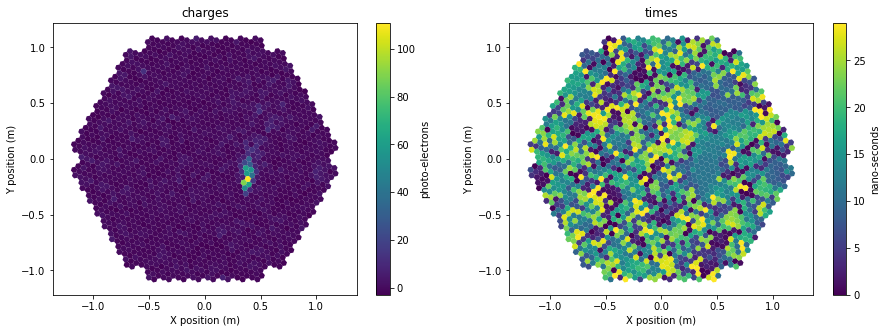

In [51]:
visible_axis = True

fig, axes = plt.subplots(1, 2, figsize=(15,5))
image = event.dl1.tel[tel_id].image
d0 = CameraDisplay(geom, image, ax=axes[0])
axes[0].set_title('charges')
d0.add_colorbar(ax=axes[0])
d0.colorbar.set_label('photo-electrons')

pulse_time = np.minimum(40, np.maximum(0, event.dl1.tel[tel_id].peak_time))

d1 = CameraDisplay(geom, pulse_time, ax=axes[1])
axes[1].set_title('times')
d1.add_colorbar(ax=axes[1])
d1.colorbar.set_label('nano-seconds')

for ax in axes:
    ax.get_xaxis().set_visible(visible_axis)
    ax.get_yaxis().set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
        ax.set_title('')
fig.patch.set_visible(visible_axis)


plt.savefig(f'calibrated_tel_{tel_id}.png', dpi=400, transparent=True)

In [53]:
visible_axisble_axis = False

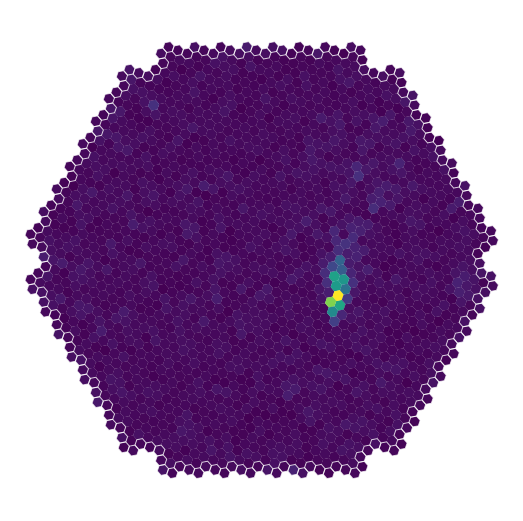

In [56]:
fig = plt.figure(figsize=(8,8))
display = CameraDisplay(geom, image)

if camera_border_color is not None:
    display.highlight_pixels(geom.get_border_pixel_mask(), color=camera_border_color)

if visible_axis:
    display.add_colorbar()
    
fig.tight_layout()

axes = fig.get_axes()
for ax in axes:
    ax.get_xaxis().set_visible(visible_axis)
    ax.get_yaxis().set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
        ax.set_title('')
fig.patch.set_visible(visible_axis)


plt.savefig(f'calibrated_charges_tel_{tel_id}.png', dpi=400, transparent=True)

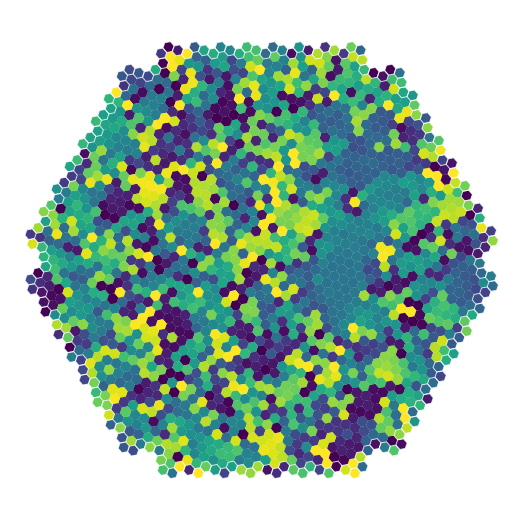

In [57]:
fig = plt.figure(figsize=(8,8))
display = CameraDisplay(geom, pulse_time)

if camera_border_color is not None:
    display.highlight_pixels(geom.get_border_pixel_mask(), color=camera_border_color)

if visible_axis:
    display.add_colorbar()
    
fig.tight_layout()

axes = fig.get_axes()
for ax in axes:
    ax.get_xaxis().set_visible(visible_axis)
    ax.get_yaxis().set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
        ax.set_title('')
fig.patch.set_visible(visible_axis)


plt.savefig(f'calibrated_times_tel_{tel_id}.png', dpi=400, transparent=True)

In [52]:
signal_pixels = tailcuts_clean(geom, image, picture_thresh=6, boundary_thresh=3, min_number_picture_neighbors=2)

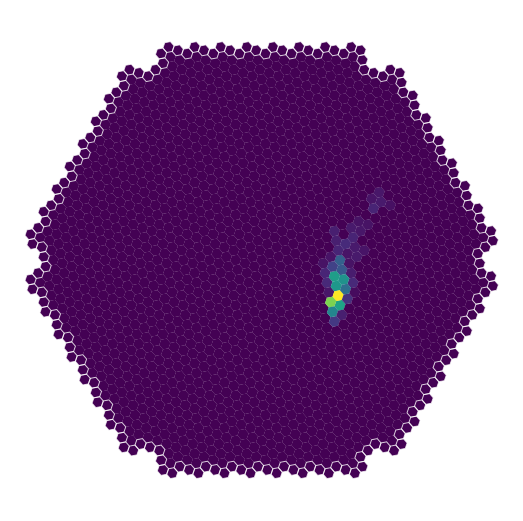

In [54]:
cleaned_image = deepcopy(image)
cleaned_image[~signal_pixels] = 0
fig = plt.figure(figsize=(8,8))
display = CameraDisplay(geom, cleaned_image)

if camera_border_color is not None:
    display.highlight_pixels(geom.get_border_pixel_mask(), color=camera_border_color)

if visible_axis:
    display.add_colorbar()
    
fig.tight_layout()

axes = fig.get_axes()
for ax in axes:
    ax.get_xaxis().set_visible(visible_axis)
    ax.get_yaxis().set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
        ax.set_title('')
fig.patch.set_visible(visible_axis)


plt.savefig(f'cleaned_tel_{tel_id}.png', dpi=400, transparent=True)

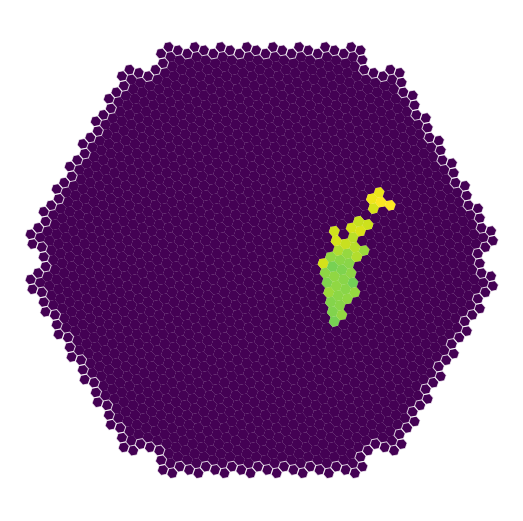

In [55]:
cleaned_time = deepcopy(pulse_time)
cleaned_time[~signal_pixels] = 0
fig = plt.figure(figsize=(8,8))

display = CameraDisplay(geom, cleaned_time)

if camera_border_color is not None:
    display.highlight_pixels(geom.get_border_pixel_mask(), color=camera_border_color)

if visible_axis:
    display.add_colorbar()
    
fig.tight_layout()

axes = fig.get_axes()
for ax in axes:
    ax.get_xaxis().set_visible(visible_axis)
    ax.get_yaxis().set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
        ax.set_title('')
fig.patch.set_visible(visible_axis)


plt.savefig(f'cleaned_time_tel_{tel_id}.png', dpi=400)

In [33]:
hillas = hillas_parameters(geom, cleaned_image)

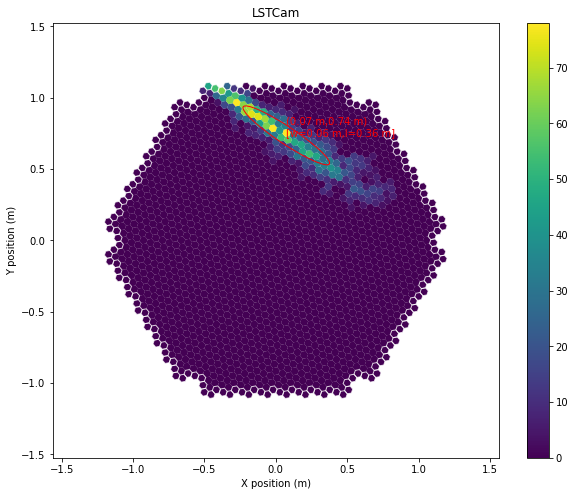

In [34]:
fig = plt.figure(figsize=(10,8))
display = CameraDisplay(geom, cleaned_image)
display.overlay_moments(hillas, color='red')

if camera_border_color is not None:
    display.highlight_pixels(geom.get_border_pixel_mask(), color=camera_border_color)

if visible_axis:
    display.add_colorbar()

axes = fig.get_axes()
for ax in axes:
    ax.get_xaxis().set_visible(visible_axis)
    ax.get_yaxis().set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
        ax.set_title('')
fig.patch.set_visible(visible_axis)

fig.savefig(f'hillas_tel_{tel_id}.png', dpi=400, transparent=True)

In [35]:
visible_axis = True
camera_border_color = None

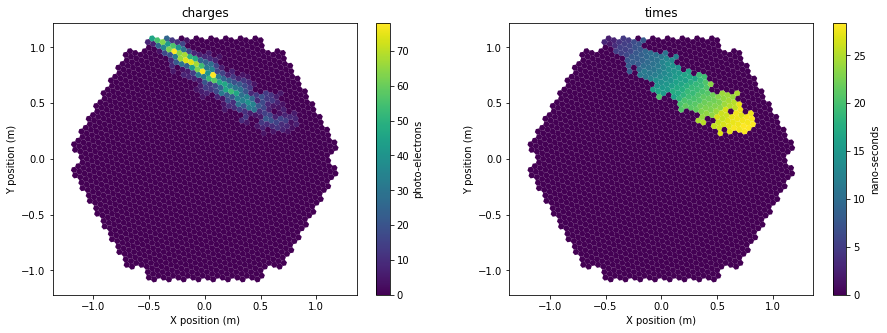

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
image = event.dl1.tel[tel_id].image
d0 = CameraDisplay(geom, cleaned_image, ax=axes[0])
# d0.overlay_moments(hillas, color='red')
axes[0].set_title('charges')

if camera_border_color is not None:
    d0.highlight_pixels(geom.get_border_pixel_mask(), color=camera_border_color)

if visible_axis:
    d0.add_colorbar(ax=axes[0])
    d0.colorbar.set_label('photo-electrons')


pulse_time = np.minimum(40, np.maximum(0, event.dl1.tel[tel_id].peak_time))
cleaned_time = deepcopy(pulse_time)
cleaned_time[~signal_pixels] = 0

d1 = CameraDisplay(geom, cleaned_time, ax=axes[1])
axes[1].set_title("times")

if camera_border_color is not None:
    d1.highlight_pixels(geom.get_border_pixel_mask(), color=camera_border_color)

if visible_axis:
    d1.add_colorbar(ax=axes[1])
    d1.colorbar.set_label('nano-seconds')


axes = fig.get_axes()
for ax in axes:
    ax.get_xaxis().set_visible(visible_axis)
    ax.get_yaxis().set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
        ax.set_title('')
fig.patch.set_visible(visible_axis)


plt.savefig(f'cleaned_tel_{tel_id}.png', dpi=400, transparent=True)